# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('C:/Users/Alexander/Desktop/skill facotry/HW2/data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('C:/Users/Alexander/Desktop/skill facotry/HW2/data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('C:/Users/Alexander/Desktop/skill facotry/HW2/data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Среднее', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Строительство', 'Страхование', 'Образование', 'Транспорт', 'СМИ/Реклама/PR-агенства', 'Здравоохранение', 'Подбор персонала', 'Информационные технологии', 'Недвижимость', 'Развлечения/Искусство', 'Наука', 'Нефтегазовая промышленность', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Энергетика', 'Туризм', 'ЧОП/Детективная д-ть', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Управляющая компания', 'Сборочные производства', 'Салоны красоты и здоровья', 'Логистика', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Маркетинг', 'Торговля', 'Ресторанный бизнес/Общественное питание', 'Государственная служба', 'Другие сферы', 'Химия/Парфюмерия/Фармацевтика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
df.isnull().sum() # есть , вот они 
# в данном примере , я заменю пропщуенные данные для числовых величин - средними 
# категориальные же величины будут отнесены в группу Другое 
# переменная PREVIOUS_CARD_NUM_UTILIZED будет удалена из датасета 
# Вообще пропущенные значения либо удаляются , либо заполняются средними(медианой),наиболее частой величиной (для категориальных признаков)
# также некоторые предлагают заполнять пропуские с помощщью алгоритма ближайших соседей

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
df.select_dtypes(include=['object']).head(0) # да, вот они 
# они будут перекодированы в дамми переменные 

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,sample


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [51]:
from sklearn.preprocessing import Imputer


def preproc_data(df_input):
    df_input = df_input.drop(['AGREEMENT_RK','PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    names=[df_input.columns.get_loc(x) for x in ('PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT')]
    for i in names:
        df_input[df_input.columns[i]]=df_input[df_input.columns[i]].map(lambda x: x.replace(',', '.') if  (type(x)!=float) else x).astype('float')

    ## Your Code Here

    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    
    quant_DF=pd.DataFrame(imp.fit_transform(df_input.select_dtypes(exclude=[object])))
    quant_DF.columns = df_input.select_dtypes(exclude=[object]).columns
    quant_DF.index = df_input.select_dtypes(exclude=[object]).index
    

    qual_DF=df_input.select_dtypes(include=[object]).fillna('Другое')
    names_obj=[x for x in qual_DF.columns if ((qual_DF[x].dtype=='object') & (x!='sample'))]      
    encode_DF=pd.get_dummies(qual_DF, columns=names_obj)
    
    df_output=pd.concat([quant_DF, encode_DF], axis=1)
    
    
    return df_output

In [53]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [54]:
X=df_train_preproc.drop(['TARGET'], axis=1)
X_test=df_test_preproc.drop(['TARGET'], axis=1)
y=df_train_preproc['TARGET']
y_test=df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [56]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
xtrain,xtest,ytrain,ytest=train_test_split(X, y, test_size=0.33, random_state=42)

## Your Code Here


In [88]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
dtc_predict = dtc.predict(xtest)
dtc_predict_pr = dtc.predict_proba(xtest)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
rf_predict = rf.predict(xtest)
rf_predict_pr = rf.predict_proba(xtest)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
logreg_predict = logreg.predict(xtest)
logreg_predict_pr = logreg.predict_proba(xtest)


## Your Code Here

In [61]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

precision_dtc=precision_score(ytest, dtc_predict)
recall_dtc=recall_score(ytest, dtc_predict)
accuracy_dtc=accuracy_score(ytest, dtc_predict)

print('DecisionTree precision', precision_score(ytest, dtc_predict))
print('DecisionTree recall', recall_score(ytest,dtc_predict))
print('DecisionTree accuracy', accuracy_score(ytest,dtc_predict))

precision_rf=precision_score(ytest, rf_predict)
recall_rf=recall_score(ytest, rf_predict)
accuracy_rf=accuracy_score(ytest, rf_predict)

print('RandomForest precision', precision_score(ytest, rf_predict))
print('RandomForest recall', recall_score(ytest,rf_predict))
print('RandomForest accuracy', accuracy_score(ytest,rf_predict))


precision_logreg=precision_score(ytest, logreg_predict)
recall_logreg=recall_score(ytest, logreg_predict)
accuracy_logreg=accuracy_score(ytest, logreg_predict)


print('LogisticRegression precision', precision_score(ytest, logreg_predict))
print('LogisticRegression recall', recall_score(ytest,logreg_predict))
print('LogisticRegression accuracy', accuracy_score(ytest,logreg_predict))

## Your Code Here

DecisionTree precision 0.170144462279
DecisionTree recall 0.173770491803
DecisionTree accuracy 0.796775477707
RandomForest precision 0.368421052632
RandomForest recall 0.0114754098361
RandomForest accuracy 0.877587579618
LogisticRegression 0.4
LogisticRegression 0.00327868852459
LogisticRegression 0.878383757962


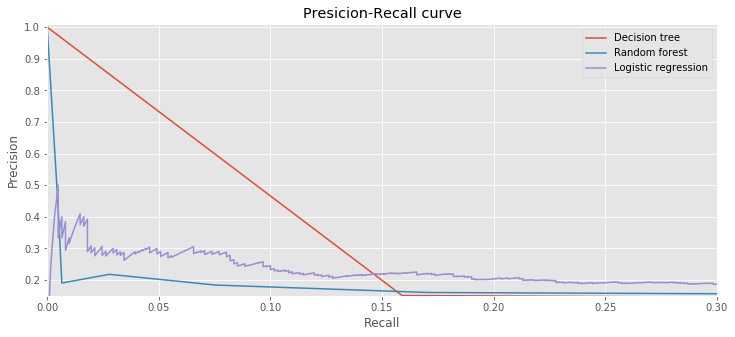

In [108]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
from sklearn.metrics import precision_recall_curve

dtc_prob = dtc_predict_pr[:, 1]
rf_prob = rf_predict_pr[:, 1]
logreg_prob = logreg_predict_pr[:, 1]

precision_dtc, recall_dtc,thresholds  = precision_recall_curve(ytest, dtc_prob)
precision_rf, recall_rf,thresholds  = precision_recall_curve(ytest, rf_prob)
precision_logreg, recall_logreg,thresholds = precision_recall_curve(ytest, logreg_prob)


plt.plot(recall_dtc, precision_dtc,label='Decision tree')
plt.plot(recall_rf, precision_rf,label='Random forest')
plt.plot(recall_logreg, precision_logreg,label='Logistic regression')

plt.legend(loc='upper right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.15, 1.01])
plt.xlim([0.0, 0.3])
plt.title('Presicion-Recall curve')


plt.show()
## Your Code Here

ROC AUC Descion tree : 0.517659533377
ROC AUC Random forest : 0.575969159233
ROC AUC Logistic regression : 0.638481508167


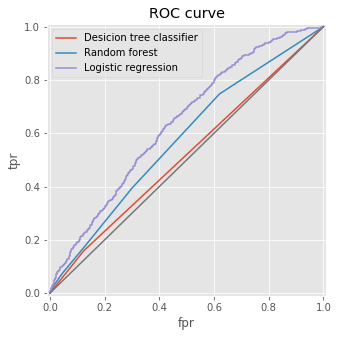

In [107]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(ytest, dtc_prob)
fpr_rf, tpr_rf, thresholds_rf  = roc_curve(ytest, rf_prob)
fpr_logreg, tpr_logreg, thresholds_logreg  = roc_curve(ytest, logreg_prob)

plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc,label='Desicion tree classifier')
plt.plot(fpr_rf, tpr_rf,label='Random forest')
plt.plot(fpr_logreg, tpr_logreg,label='Logistic regression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc='upper left')

print('ROC AUC Descion tree :',roc_auc_score(ytest, dtc_prob))
print('ROC AUC Random forest :',roc_auc_score(ytest, rf_prob))
print('ROC AUC Logistic regression :',roc_auc_score(ytest, logreg_prob))

## Your Code Here

In [109]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
from sklearn.cross_validation import cross_val_score
dtc = DecisionTreeClassifier()
dtc_cv=cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

rf = RandomForestClassifier()
rf_cv=cross_val_score(
    rf,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

logreg = LogisticRegression()
logreg_cv=cross_val_score(
    logreg,
    X,
    y,
    scoring='roc_auc',
    cv=10
)


## Your Code Here

In [89]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
print ('DecisionTree:', dtc_cv.mean())
print ('Random forest:',rf_cv.mean())
print ('Logistic regression:', logreg_cv.mean())



logreg.fit(X y)
predict = logreg.predict_proba(X_test)
## Your Code Here

DecisionTree: 0.518716685152
Random forest: 0.576272412217
Logistic regression: 0.640520747494


ROC AUC: 0.621109856709


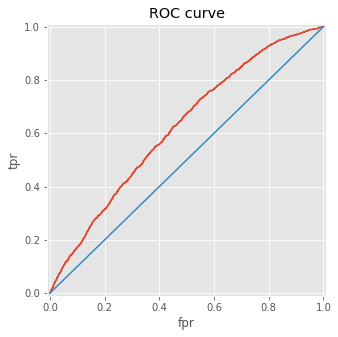

In [103]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
fprlogreg, tprlogreg, thresholdslogreg  = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fprlogreg, tprlogreg,label='Logistic regression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('ROC AUC:',roc_auc_score(y_test, predict[:,1]))

## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [121]:
### И далее ;)
from fancyimpute import KNN

ModuleNotFoundError: No module named 'fancyimpute'

In [119]:
!pip install --upgrade pip

  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


Exception:
Traceback (most recent call last):
  File "C:\Users\Alexander\Anaconda3\lib\shutil.py", line 387, in _rmtree_unsafe
    os.unlink(fullname)
PermissionError: [WinError 5] Отказано в доступе: 'C:\\Users\\ALEXAN~1\\AppData\\Local\\Temp\\pip-tyblbgjm-uninstall\\users\\alexander\\anaconda3\\scripts\\pip.exe'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Alexander\Anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
  File "C:\Users\Alexander\Anaconda3\lib\site-packages\pip\commands\install.py", line 342, in run
  File "C:\Users\Alexander\Anaconda3\lib\site-packages\pip\req\req_set.py", line 795, in install
  File "C:\Users\Alexander\Anaconda3\lib\site-packages\pip\req\req_install.py", line 767, in commit_uninstall
  File "C:\Users\Alexander\Anaconda3\lib\site-packages\pip\req\req_uninstall.py", line 142, in commit
  File "C:\Users\Alexander\Anaconda3\lib\site-packages\pip\_vendor\retrying.py